Simplified End-To-End Simulation Analysis
==

Random Number Generator
--

It's a replace for Python's random.uniform function which is generating float numbers between the lower and upper limits given as input. Linear congruential method was used to create this function and there is a configurable seed. Recommended seed is using timestamp as a input. Parameters of LCG which are a, c, and m selected from "Numerical Recipes: The Art of Scientific Computing" book according to Hull Dobel theorem.

**1)**

In [1]:
import time
import matplotlib.pyplot as plt


class LCG:
    def __init__(self, seed=time.time()):
        self.set_seed_lcg(seed)

    # Set a starting seed for LCG.
    def set_seed_lcg(self, seed):  # Timestamp as a seed for default.
        global rand
        rand = float(seed)

    # Parameters taken from https://www.wikiwand.com/en/Numerical_Recipes
    # "Numerical Recipes: The Art of Scientific Computing", William H. Press, Saul A. Teukolsky, William T. Vetterling and Brian P. Flannery.
    def custom_uniform(self, low_lim=0.0, up_lim=100.0, precision=True):
        # Linear Congruential Method
        # x1 = (x0 * a + c) % m
        a = 1664525
        c = 1013904223
        m = 2**32 - 1  # -1 is for precision.
        global rand
        rand = (((a*rand + c) % m) % up_lim) + low_lim
        # Get precision between 0 and 1.
        if (precision):
            rand = rand + self.custom_uniform(0, 1000, False) / 1000
        if up_lim == 1:
            rand = rand % 1
        else:
            rand
        return rand

[26.110500000000002, 3.6171419184207916, 47.13205147194862, 1.3505069057941437, 75.63044746637344, 93.6737590830326, 37.30809271740913, 76.8304703991413, 62.61952664065361, 91.03226352739334]


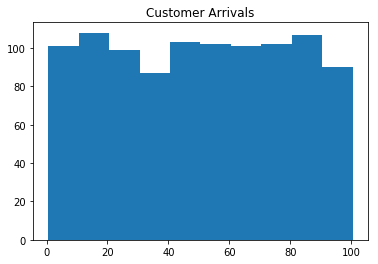

In [2]:
randomizer = LCG()
test_samples = [randomizer.custom_uniform() for _ in range(1000)]
print(test_samples[:10])  # Print 10 of them.

plt.title('Customer Arrivals')
plt.hist(test_samples)
plt.show()

As you can see, custom random number generator can provide high **independence**, **periodicity**, and **uniformity**.

**2.a)**
--

In [3]:
from sklearn.model_selection import train_test_split
import pandas

# Read and turn CSV into dataframe of pandas.
# Squeeze for turning dataframe into array and no header is selected.
df = pandas.read_csv('customer_arrivals.csv', squeeze=True, header=None)

# Split for analysis and validation set.
# 20% of data will be used for validation.
val_perc = 0.2
analysis_set, validation_set = train_test_split(df, test_size=val_perc, shuffle=False)

print('Total number of data in analysis set:', len(analysis_set))
print('Total number of data in validation set:', len(validation_set))

Total number of data in analysis set: 800
Total number of data in validation set: 200


**2.b)**
--

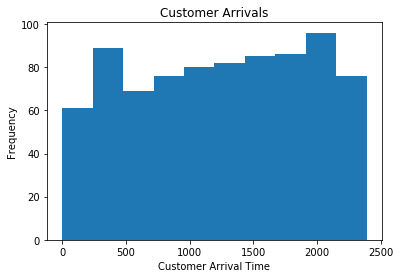

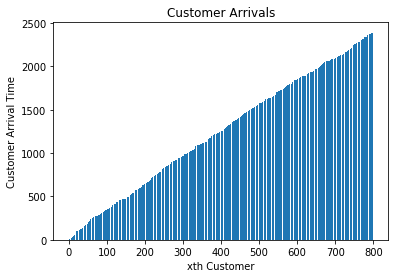

In [4]:
plt.title('Customer Arrivals')
plt.ylabel('Frequency')
plt.xlabel('Customer Arrival Time')
plt.hist(analysis_set)
plt.show()

x_seq = [x for x in range(len(analysis_set))]
plt.title('Customer Arrivals')
plt.ylabel('Customer Arrival Time')
plt.xlabel('xth Customer')
plt.bar(x_seq, analysis_set)
plt.show()


**2.c)**
--

If data has time values between events it is suitable for **exponential distribution**. It can be used to approximate next customer arrival time after modelling and analyse. Also, it's a **memoryless** distribution which doesn't depend on previous events when calculating probability and **stable** 1/lambda does not change. To use exponential distribution we have to find inter-arrival times of customers NOT only arrival times.

Total number of data in analysis IATs: 800
Total number of data in validation IATs: 199


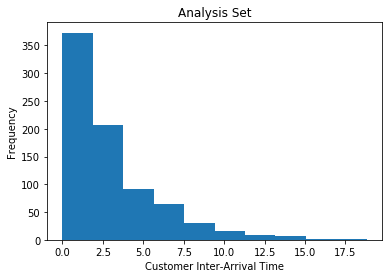

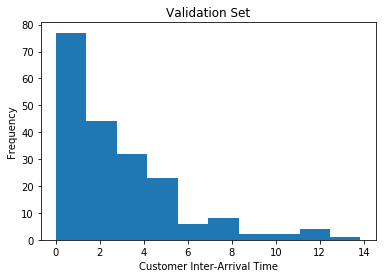

In [5]:
def cal_interarrival_times(df):
    iats = [0] * len(df)
    iats[0] = df[0]  # First inter-arrival time is same as arrival time.
    it = 1
    for it in range(len(df)-1):
        iats[it] = df[it+1] - df[it]
    
    analysis_iats = iats[:len(analysis_set)]
    validation_iats = iats[len(analysis_set):len(df)-1]
    
    return analysis_iats, validation_iats

analysis_iats, validation_iats = cal_interarrival_times(list(df))

print('Total number of data in analysis IATs:', len(analysis_iats))
print('Total number of data in validation IATs:', len(validation_iats))

plt.title('Analysis Set')
plt.ylabel('Frequency')
plt.xlabel('Customer Inter-Arrival Time')
plt.hist(analysis_iats)
plt.show()

plt.title('Validation Set')
plt.ylabel('Frequency')
plt.xlabel('Customer Inter-Arrival Time')
plt.hist(validation_iats)
plt.show()

**2.d)**
--

Maximum Likelihood Function For Exponential Distribution
--
![Maximum Likelihood Function For Exponential Distribution](ml.png)

In [6]:
from math import e

# Probability Density Function: f(x)
def exp_pdf(lamb, x):
    return lamb * (e ** (-lamb * x))

# Cumulative Distribution Function: F(x)
def exp_cdf(lamb, x):
    return 1 - (e ** (-lamb * x))

# Maximum likelihood function result for exponential distribution after sum, log, and derivation operations.
def ml_estimator(x):
    return len(x) / sum(x)

estimated_lambda = ml_estimator(analysis_iats)
mean = 1 / estimated_lambda
std_deviation = mean
variance = mean ** 2
print('Estimated lambda:',estimated_lambda)
print('Mean:',mean)
print('Standard deviation:',std_deviation)
print('Variance:',variance)

Estimated lambda: 0.3346216265957269
Mean: 2.98845
Standard deviation: 2.98845
Variance: 8.9308334025


**2.e)**
--

Inverse Transform Method
--
![Inverse Transform Method](itm.png)

In [7]:
from math import log

# Inverse Transform Method: F-1(R-1)
def exp_itm(lamb, u):
    return (-log(u, e) / lamb)

for i in range(10):
    selected_prob = randomizer.custom_uniform(0, 1)
    print('Selected probability is {} and ITF result is {}.'.format(selected_prob, exp_itm(estimated_lambda, selected_prob)))

Selected probability is 0.25110620069503786 and ITF result is 4.129677250858065.
Selected probability is 0.11638048994541172 and ITF result is 6.427828325886135.
Selected probability is 0.6652775030136109 and ITF result is 1.217945868449007.
Selected probability is 0.6885352979898453 and ITF result is 1.1152557530877858.
Selected probability is 0.45292186546325686 and ITF result is 2.366958940624214.
Selected probability is 0.529866216659546 and ITF result is 1.8980564172082894.
Selected probability is 0.05423817443847656 and ITF result is 8.709449902188.
Selected probability is 0.15816235947608948 and ITF result is 5.511099807584149.
Selected probability is 0.6713199238777161 and ITF result is 1.190925622436156.
Selected probability is 0.4681383650302888 and ITF result is 2.2682077745791296.


**3)**
--

In [8]:
from scipy import stats

ks_test_stat, p_val = stats.kstest(validation_iats, 'expon')

# Kolmogorov-Smirnov technique can be used for validating continuous data.
print('Kolmogorov-Smirnov Validation Test Statistic:', ks_test_stat)
print('P-Value:', p_val)

# Chi square test for validation.
# 0-4, 4-8, 8-12, 12-16
# Four intervals are selected to test frequency differences.
v_4 = [] 
a_4 = []
v_8 = []
a_8 = []
v_12 = []
a_12 = []
v_16 = []
a_16 = []

for v in validation_iats:
    if v <= 4:
        v_4.append(v)
    elif v <= 8:
        v_8.append(v)
    elif v <= 12:
        v_12.append(v)
    else:
        v_16.append(v)

for a in analysis_iats:
    if a <= 4:
        a_4.append(a)
    elif a <= 8:
        a_8.append(a)
    elif a <= 12:
        a_12.append(a)
    else:
        a_16.append(a)

obs_fs = [len(a_4), len(a_8), len(a_12), len(a_16)]  # Observed frequencies (analysis set).
exp_fs = [len(v_4), len(v_8), len(v_12), len(v_16)]  # Expected frequencies (validation set).
result_chisquare = stats.chisquare(obs_fs, exp_fs)

print('Result of Chi Square Test:', result_chisquare)

Kolmogorov-Smirnov Validation Test Statistic: 0.41115403318128757
P-Value: 6.051345183900679e-31
Result of Chi Square Test: Power_divergenceResult(statistic=1840.6430602788218, pvalue=0.0)


**4)**
--

In [18]:
import des

experiments_df = pandas.read_csv('experiments.csv')
cols = ['Num cabbages on shelf', 'Num cabbages bought', 'Num customers without cabbages', 'Num rotten cabbages']

# Generic stop_after conditions:
# - total_cus_arrived
# - happy_cus_left
# - sad_cus_left
# - time
stop_afters = [('happy_cus_left', x) for x in experiments_df['Num cabbages bought']]
stock_ranges = [x for x in experiments_df['Num cabbages on shelf']]
test_results = []
print(stop_afters)
print(stock_ranges)
print('Total number of experiments', len(experiments_df['Num cabbages on shelf']))

for i in range(len(experiments_df['Num cabbages on shelf'])):
    test_results.append(des.simulation(stock_ranges[i], stop_afters[i], test_mode=True))
    
print(test_results)

# Chi square validation test.
exp_fs = experiments_df['Num rotten cabbages']
obs_fs = [x['total_rotten'] for x in test_results]
result_chisquare = stats.chisquare(obs_fs, exp_fs)
print()
print('Result of Chi Square Test:', result_chisquare)

[('happy_cus_left', 968), ('happy_cus_left', 993), ('happy_cus_left', 991)]
[8, 9, 10]
Total number of experiments 3
[{'total_rotten': 92, 'sad_cus_left': 3, 'happy_cus_left': 968, 'time': 1895.3110392457238, 'total_cus_arrived': 971, 'iterator': 3185}, {'total_rotten': 65, 'sad_cus_left': 1, 'happy_cus_left': 993, 'time': 2022.6990175887383, 'total_cus_arrived': 994, 'iterator': 3168}, {'total_rotten': 130, 'sad_cus_left': 2, 'happy_cus_left': 991, 'time': 2012.585449582697, 'total_cus_arrived': 993, 'iterator': 3362}]

Result of Chi Square Test: Power_divergenceResult(statistic=1727.7035168034622, pvalue=0.0)


**5)**
--

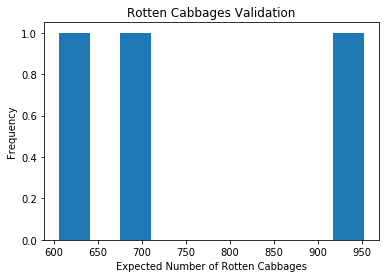

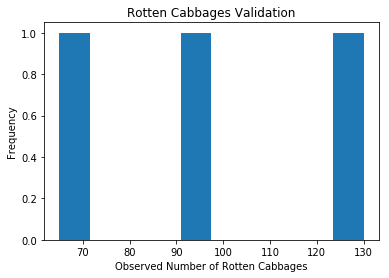

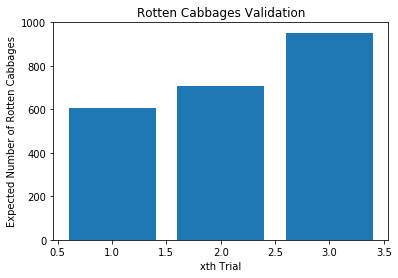

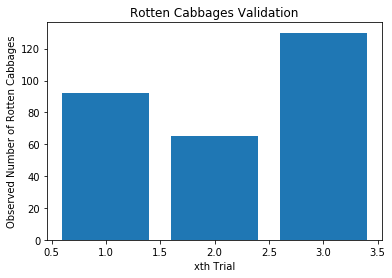

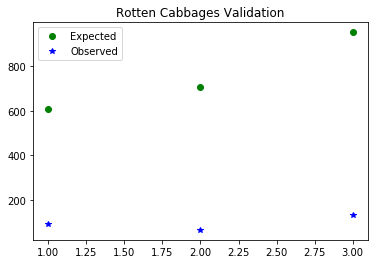

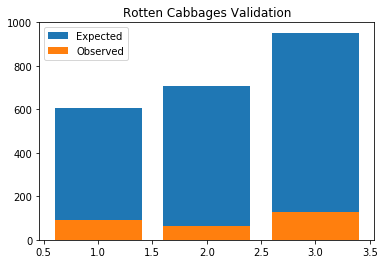

In [23]:
plt.title('Rotten Cabbages Validation')
plt.ylabel('Frequency')
plt.xlabel('Expected Number of Rotten Cabbages')
plt.hist(exp_fs)
plt.show()

plt.title('Rotten Cabbages Validation')
plt.ylabel('Frequency')
plt.xlabel('Observed Number of Rotten Cabbages')
plt.hist(obs_fs)
plt.show()

plt.title('Rotten Cabbages Validation')
plt.ylabel('Expected Number of Rotten Cabbages')
plt.xlabel('xth Trial')
plt.bar([1, 2, 3], exp_fs)
plt.show()

plt.title('Rotten Cabbages Validation')
plt.ylabel('Observed Number of Rotten Cabbages')
plt.xlabel('xth Trial')
plt.bar([1, 2, 3], obs_fs)
plt.show()

plt.title('Rotten Cabbages Validation')
p1 = plt.plot([1,2,3], exp_fs, 'go')  # green dots
p2 = plt.plot([1,2,3], obs_fs, 'b*')  # blue stars
plt.legend((p1[0], p2[0]), ('Expected', 'Observed'))
plt.show()

plt.title('Rotten Cabbages Validation')
p1 = plt.bar([1,2,3], exp_fs)
p2 = plt.bar([1,2,3], obs_fs)
plt.legend((p1[0], p2[0]), ('Expected', 'Observed'))
plt.show()